Import useful libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

%load_ext autoreload
%autoreload 2

In [2]:
import ctypes

lib_path = "/home/matteo/Downloads/ac/build/"

class ACreturn(ctypes.Structure):
	_fields_ = [ ("average", ctypes.c_double), ("sigmaF", ctypes.c_double), ("sigmaF_error", ctypes.c_double), ("ACtime", ctypes.c_double), ("ACtimeError", ctypes.c_double) ]


def ComputeStatistics(data):
	ft_lib = ctypes.cdll.LoadLibrary(lib_path + "libac.so")

	arg = (ctypes.c_double * len(data))(*data)
	avg = ft_lib.Wrapper
	avg.restype = ACreturn

	return avg(arg, len(data))

# Block spin analysis

In [8]:
from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *

In [39]:
dataset1 = Dataset(16, 16)
for i in range(1, 18):
    dataset1.add_data("data/simu/yukawa_scan/yukawa_scan_1/conf" + str(i), ["fermions", "yukawa_coupling"], 1, 16)

In [40]:
dataset2 = Dataset(32, 32)
for i in range(1, 18):
    dataset2.add_data("data/simu/yukawa_scan/yukawa_scan_2/conf" + str(i), ["fermions", "yukawa_coupling"], 1, 32)

# Magnetisation

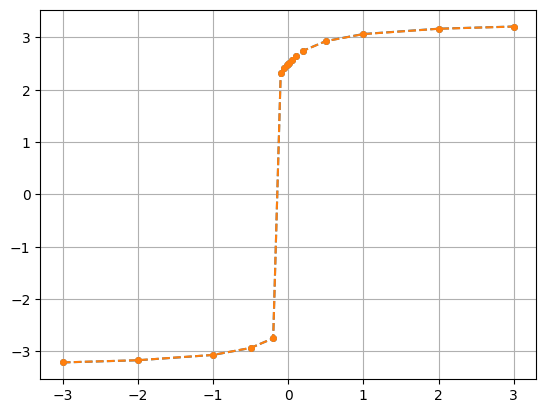

In [33]:
plt.errorbar(dataset1.parameters, [v[0] for v in dataset1.phi], [v[1] for v in dataset1.phi], fmt='o--', markersize=4, label='s=1')
plt.errorbar(dataset2.parameters, [v[0] for v in dataset2.phi], [v[1] for v in dataset2.phi], fmt='o--', markersize=4, label='s=2')
#plt.errorbar(timo.parameters, [v[0] for v in timo.phi], [v[1] for v in timo.phi], fmt='o--', markersize=4)
plt.grid()
#plt.legend()
plt.savefig("timo.pdf")

# Susceptibility

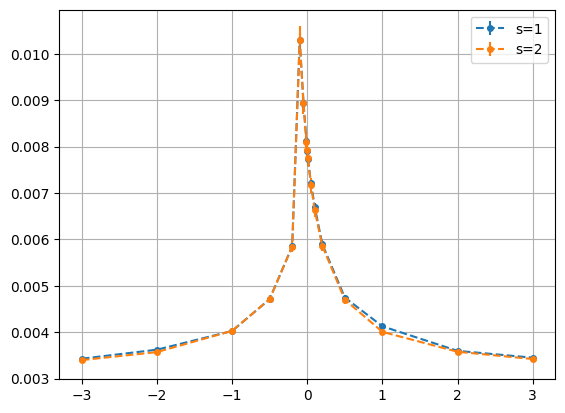

In [34]:
plt.errorbar(dataset1.parameters, [v[0] for v in dataset1.chi2], [v[1] for v in dataset1.chi2], fmt='o--', markersize=4, label='s=1')
plt.errorbar(dataset2.parameters, [v[0] for v in dataset2.chi2], [v[1] for v in dataset2.chi2], fmt='o--', markersize=4, label='s=2')
plt.grid()
plt.legend()
plt.show()

# Condensate

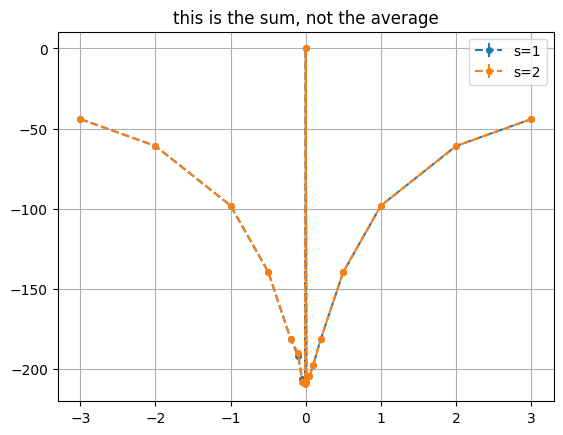

In [35]:
plt.errorbar(dataset1.parameters, [dataset1.Nx*dataset1.Nx*v[0] for v in dataset1.condensate], [dataset1.Nx*dataset1.Nx*v[1] for v in dataset1.condensate], fmt='o--', markersize=4, label='s=1')
plt.errorbar(dataset2.parameters, [dataset2.Nx*dataset2.Nx*v[0] for v in dataset2.condensate], [dataset2.Nx*dataset2.Nx*v[1] for v in dataset2.condensate], fmt='o--', markersize=4, label='s=2')
plt.grid()
plt.legend()
plt.title("this is the sum, not the average")
plt.show()

# Physical quark mass

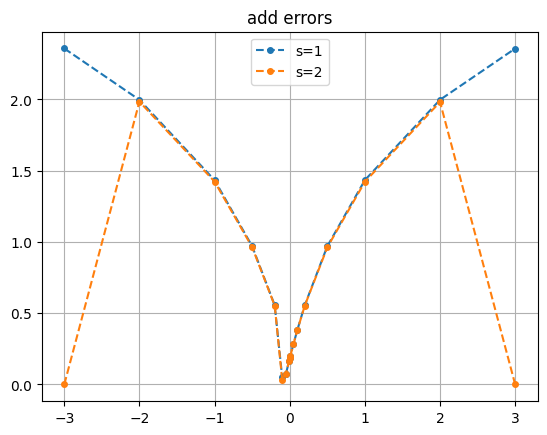

In [36]:
plt.plot(dataset1.parameters, [v[0] for v in dataset1.m_q_phys], 'o--', markersize=4, label='s=1')
plt.plot(dataset2.parameters, [v[0] for v in dataset2.m_q_phys], 'o--', markersize=4, label='s=2')
plt.grid()
plt.legend()
plt.title("add errors")
plt.show()

# Renormalised boson mass

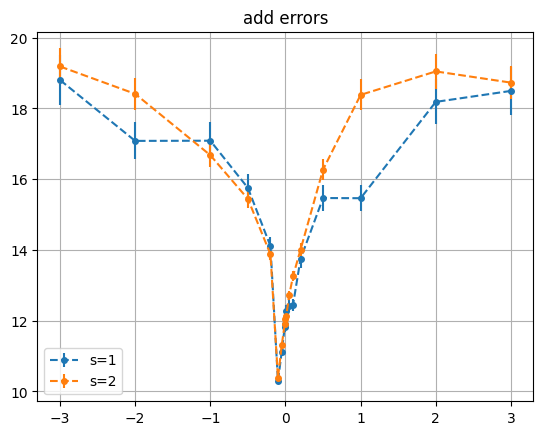

In [46]:
plt.errorbar(dataset1.parameters, [dataset1.Nx*v[0] for v in dataset1.m_phi_r], [dataset1.Nx*v[1] for v in dataset1.m_phi_r], fmt='o--', markersize=4, label='s=1')
plt.errorbar(dataset2.parameters, [dataset2.Nx*v[0] for v in dataset2.m_phi_r], [dataset2.Nx*v[1] for v in dataset2.m_phi_r], fmt='o--', markersize=4, label='s=2')
plt.grid()
plt.legend()
plt.show()